## ENTREGA 3 DE SISTEMAS INTELIGENTES

### Alejandro Inglés e Israel Brea

### DEFINICIÓN DEL PROBLEMA
Se presenta un problema donde en un futuro lejano, una nave espacial Titanic, con casi 13.000 
pasajeros a bordo, emprende su viaje inaugural hacia tres exoplanetas habitables. Mientras 
rodeaba Alpha Centauri en ruta hacia su primer destino, la nave espacial Titanic chocó con una 
anomalía del espacio-tiempo escondida dentro de una nube de polvo. La nave permaneció 
intacta, sin embargo, casi la mitad de los pasajeros fueron transportados a una dimensión 
alternativa. 
El objetivo del algoritmo será predecir dado un individuo (si hubiera estado en esa situación) si 
sería transportado o no. 

### VISUALIZACION  y Selección de variables

En la visualización/exploración de nuestro conjunto de datos podemos extraer la siguiente 
información:

    • El conjunto de datos es información sobre los pasajeros a bordo de la nave espacial 
    Titanic.

    • Se obtuvo la información personal de aproximadamente 8700 pasajeros.

    • La variable de estudio es representada por si el pasajero fue transportado a otra 
    dimensión o no.

    • Los datos recogen 8693 individuos de los cuales 4315 no fueron transportados a otra 
    dimensión y 4378 que sí que lo fueron.

    • Que cada individuo tiene 14 atributos/variables, 7 nominales, 6 numéricos y la variable 
    respuesta: 

        ✓ @attribute 'PassengerId': Una identificación única para cada pasajero. Cada Id 
        toma la forma gggg_pp donde gggg indica un grupo con el que viaja el pasajero y 
        pp es su número dentro del grupo. Las personas en un grupo a menudo son 
        miembros de la familia, pero no siempre.

        ✓ @attribute 'HomePlanet': Planeta del que parte el pasajero.

        ✓ @attribute 'CryoSleep': Indica si el pasajero eligió ser puesto en animación 
        suspendida durante la duración del viaje. Los pasajeros en crio sueño están 
        confinados en sus cabinas.

        ✓ @attribute 'Cabin': El número de cabina donde se hospeda el pasajero. Toma la 
        forma cubierta/número/lado, donde lado puede ser P para babor o S para estribor. 

        ✓ @attribute 'Destination': El planeta en el que desembarcará el pasajero.

        ✓ @attribute 'Age': Edad del pasajero.

        ✓ @attribute 'VIP' : Si el pasajero es VIP o no.

        ✓ @attribute 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck': Dinero 
        facturado en cada uno de los servicios de lujo

        ✓ @attribute 'Name': Los nombres y apellidos del pasajero/a.

        ✓ @attribute 'Transported': Si el pasajero fue transportado a otra dimensión o no.

    • Las variables que borraremos serán Destination, RoomService, FoodCourt, 
    ShoppingMall, Spa y VRDeck y Name (dinero gastado, el nombre y el destino de un 
    pasajero) debido a que son variables que estamos seguros de que no van a influenciar 
    en nada a que un pasajero se transporte o no.

    • El resto de variables hemos decidido tratarlas para su posterior análisis. Como 
    desconocemos totalmente los motivos por lo que un individuo se transporta o no, no 
    queremos descartar las diferentes teorías por muy extrañas que sean. Por lo que 
    trabajaremos con ellas, y finalmente, en la poda podremos concretar y descartar estas 
    opciones. Principalmente barajamos dos teorías que podrían influir en el destino de un 
    pasajero:

        ✓ Más probable: La localización en el momento del impacto
        ✓ Menos probable: Las condiciones físicas y la tendencia genética a la 
           transportación.

Sospechamos que el motivo más probable de que un individuo se transporte o no será 
su localizacion en la nave en el momento del impacto. Por eso hemos decidido dejar 
las variables que pueden tener relación con esta; PassengerId, CryoSleep, Cabin y VIP.
Sin embargo, también pensamos que el destino de un individuo también puede 
depender de alguna forma de su genética/rasgos físicos, por lo que hemos creído 
oportuno dejar las variables: PassengerId, HomePlanet y Age. Características físicas 
como por ejemplo son la altura o el peso, capacidades físicas como la velocidad para 
escapar, la fuerza para agarrase a las cosas… O simplemente la tendencia genética a 
ser transportado a otra dimensión. (que no tenemos ni idea si podría influir).

Es destacable el motivo por el que creemos que la variable PassengerId es muy 
importante, ya que extrayendo unicamente la informacion de la familia a la que 
permanece un individuo, esta nos puede arrojar información sobre su localización 
(entendemos que una persona tiene más probabilidades de moverse por la nave 
acompañado de sus allegados, que en solitarioo con gente sin ninguna relación), y 
también sobre sus carcterísticas genéticas.
Parecido (con respecto a la ubicación )con los que pensamos de la variable VIP, que 
creemos que un individuo de una determinada clase social tiene más probabilidades 
de estar con sus iguales en zonas reservadas para estos.



In [1]:
#IMPORTACION DE LIBRERIAS 

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import numpy as np

In [2]:
##Compruebo que la lectura de los datos se hace correspondente (viendo si detecta los datos faltantes)

In [3]:
df= pd.read_csv('./conjDatosE3.csv', na_values= '?')

In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,'Maham Ofracculy',False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,'Juanna Vines',True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,'Altark Susent',False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,'Solam Susent',False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,'Willy Santantines',True


In [5]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## PREPROCESADO DE LOS DATOS

### 1) Quitamos las variables inútiles
### 2) Tratamos los valores perdidos --> imputacion
### 3) Ingeniería de características 
Obtener informacion a partir de variables existentes para crear nuevas con más sentido
### 4) Tratamiento de variables categóricas y continuas
Discretizamos en 4 intervalos de igual dimensión la variable edad
### 5) Normalización de variables

In [6]:
#QUITAMOS LAS VARIABLES/ATRIBUTOS QUE EN LA EXPLORACION/VISUALIZACION DE LOS DATOS QUE HEMOS DECIDIDO QUE NO 
#INFLUYEN EN LA VARIABLE RESPUESTA

In [7]:
datos = df[['PassengerId','HomePlanet','CryoSleep', 'Cabin', 'Age', 'VIP', 'Transported']]

In [8]:
datos

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,Transported
0,0001_01,Europa,False,B/0/P,39.0,False,False
1,0002_01,Earth,False,F/0/S,24.0,False,True
2,0003_01,Europa,False,A/0/S,58.0,True,False
3,0003_02,Europa,False,A/0/S,33.0,False,False
4,0004_01,Earth,False,F/1/S,16.0,False,True
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,41.0,True,False
8689,9278_01,Earth,True,G/1499/S,18.0,False,False
8690,9279_01,Earth,False,G/1500/S,26.0,False,True
8691,9280_01,Europa,False,E/608/S,32.0,False,False


In [9]:
##TRATAMIENTO DE VALORES PERDIDOS --> IMPUTACION a través del column transformer

In [10]:
datos.isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Age            179
VIP            203
Transported      0
dtype: int64

In [11]:
#para comprobar que hemos solucionado bien la imputación, vemos por ejemplo los valores perdido de la variable cryoSleep para
#comprobar posteriormente que se han imputado correctamente

missing = datos['CryoSleep'].isnull()
datos[missing][0:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,Transported
92,0099_02,Earth,NaN,G/12/P,2.0,False,True
98,0105_01,Earth,NaN,F/21/P,27.0,False,False
104,0110_02,Europa,NaN,B/5/P,40.0,False,False
111,0115_01,Mars,NaN,F/24/P,26.0,False,True
152,0173_01,Earth,NaN,E/11/S,58.0,False,True


In [12]:
#Realizamos LA IMPUTACION a través de transformaciones sobre las columnas

ct = ColumnTransformer([
    ("nada",'passthrough',['PassengerId']), #no tiene valores perdidos y no aplicamos nada
    ("modaHP",SimpleImputer(strategy='most_frequent'),['HomePlanet']),
    ("modaCS",SimpleImputer(strategy='most_frequent'),['CryoSleep']), #se imputa por la moda
    ("modaC",SimpleImputer(strategy='most_frequent'),['Cabin']),
    ("media",SimpleImputer(strategy='mean'),['Age']), # por la media
    ("modaV",SimpleImputer(strategy='most_frequent'),['VIP'])
    ], remainder='passthrough') #para la ultima variable lo hacemos así, pero podriamos hacerlo igual que en la primera variable

datos2 = ct.fit_transform(datos)

#Comprobamos que los valores se han imputado correctamente

datos2[missing][0:5]

array([['0099_02', 'Earth', False, 'G/12/P', 2.0, False, True],
       ['0105_01', 'Earth', False, 'F/21/P', 27.0, False, False],
       ['0110_02', 'Europa', False, 'B/5/P', 40.0, False, False],
       ['0115_01', 'Mars', False, 'F/24/P', 26.0, False, True],
       ['0173_01', 'Earth', False, 'E/11/S', 58.0, False, True]],
      dtype=object)

In [13]:
# Al aplicar el column transformer de sklearn nuestros datos pasan a formato numpy (que es más pesado de ver)
# para que sea más agradable lo pasamos a tabla de datos pamda

datos21 = pd.DataFrame(datos2, columns=datos.columns)
datos21

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,Transported
0,0001_01,Europa,False,B/0/P,39.0,False,False
1,0002_01,Earth,False,F/0/S,24.0,False,True
2,0003_01,Europa,False,A/0/S,58.0,True,False
3,0003_02,Europa,False,A/0/S,33.0,False,False
4,0004_01,Earth,False,F/1/S,16.0,False,True
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,41.0,True,False
8689,9278_01,Earth,True,G/1499/S,18.0,False,False
8690,9279_01,Earth,False,G/1500/S,26.0,False,True
8691,9280_01,Europa,False,E/608/S,32.0,False,False


In [14]:
# INGENIERIA DE CARACTERISTICAS:
#A partir de la variable cabin, obtenemos los atributos CUBIERTA/PLANTA y LADO.
#La variable CUBIERTA/PLANTA corresponde a la altura en la que estan situadas las cabinas.
#La variable LADO corresponde a si la cabina se sitúa a estribor o a babor
#que describen la ubicacion de los camarotes de los pasajeros

In [15]:
#VARIABLE CATEGORICA ORDINAL (cuyo orden es el alfabético)

datos21['CUBIERTA/PLANTA'] = datos21['Cabin'].apply(lambda cabin: cabin[0] ) #no hay datos con valores faltantes
datos21[0:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,Transported,CUBIERTA/PLANTA
0,0001_01,Europa,False,B/0/P,39.0,False,False,B
1,0002_01,Earth,False,F/0/S,24.0,False,True,F
2,0003_01,Europa,False,A/0/S,58.0,True,False,A
3,0003_02,Europa,False,A/0/S,33.0,False,False,A
4,0004_01,Earth,False,F/1/S,16.0,False,True,F


In [16]:
#VARIABLE CATEGORICA NOMINAL

datos21['LADO'] = datos21['Cabin'].apply(lambda cabin: cabin.split('/')[2] ) #no hay datos con valores faltantes  
datos21[0:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,Transported,CUBIERTA/PLANTA,LADO
0,0001_01,Europa,False,B/0/P,39.0,False,False,B,P
1,0002_01,Earth,False,F/0/S,24.0,False,True,F,S
2,0003_01,Europa,False,A/0/S,58.0,True,False,A,S
3,0003_02,Europa,False,A/0/S,33.0,False,False,A,S
4,0004_01,Earth,False,F/1/S,16.0,False,True,F,S


In [17]:
# INGENIERIA DE CARACTERISTICAS:
#A partir de la variable passengerId, obtenemos el atributo FAMILIA, que se corresponde a la familia (grupo de allegados)
# a la que pertenece un individuo (que nos interesa como comentamos anteriormente en la visualizacion)

In [18]:
#VARIABLE CATEGORICA NOMINAL

datos21['FAMILIA'] = datos21['PassengerId'].apply(lambda id: id[0:4] ) #no hay datos con valores faltantes
datos21[0:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,Transported,CUBIERTA/PLANTA,LADO,FAMILIA
0,0001_01,Europa,False,B/0/P,39.0,False,False,B,P,0001
1,0002_01,Earth,False,F/0/S,24.0,False,True,F,S,0002
2,0003_01,Europa,False,A/0/S,58.0,True,False,A,S,0003
3,0003_02,Europa,False,A/0/S,33.0,False,False,A,S,0003
4,0004_01,Earth,False,F/1/S,16.0,False,True,F,S,0004


In [19]:
datos4 = datos21[['FAMILIA','HomePlanet','CryoSleep', 'CUBIERTA/PLANTA',  'LADO' , 'Age', 'VIP', 'Transported']]
datos4

,FAMILIA,HomePlanet,CryoSleep,CUBIERTA/PLANTA,LADO,Age,VIP,Transported
0,0001,Europa,False,B,P,39.0,False,False
1,0002,Earth,False,F,S,24.0,False,True
2,0003,Europa,False,A,S,58.0,True,False
3,0003,Europa,False,A,S,33.0,False,False
4,0004,Earth,False,F,S,16.0,False,True
...,...,...,...,...,...,...,...,...
8688,9276,Europa,False,A,P,41.0,True,False
8689,9278,Earth,True,G,S,18.0,False,False
8690,9279,Earth,False,G,S,26.0,False,True
8691,9280,Europa,False,E,S,32.0,False,False


In [20]:
# TRATAMIENTO DE VARIABLES CATEGÓRICAS

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OrdinalEncoder


In [21]:
datos4['CUBIERTA/PLANTA'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [22]:
#No usamos pipeline ya que no nos interesa hacer todas las trasnformaciones en un ctransformer (imputar, binarizar...)
#ya creado nuevas caracteristicas a partir de las ya existentes y para eso tenían que estar sin datos faltantes.

#Discretizamos age porque vemos más funcional/descriptivo saber si dependiendo de lo mayor/jóven que es una persona sería transportado o no.


ct2 = ColumnTransformer([
    ("HP", OneHotEncoder() ,['HomePlanet']),
    ("CS",OneHotEncoder() ,['CryoSleep']),
    ("A",   KBinsDiscretizer(4, strategy='uniform', encode='ordinal') , ['Age']), #dividimos en funcion solo de la edad (independientemente de la cantidad de gente en cada uno de ellos)
    ("VIP",OneHotEncoder(),['VIP']),                                              #una vez discretizado, es una var categorica ordinal
    ("LD",OneHotEncoder(),['LADO']),
    ("ordCP",  OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']])  , ['CUBIERTA/PLANTA']), #variable categorica ordinal
    #("fam", OneHotEncoder()  ,['FAMILIA'])
    ("nada", OneHotEncoder() ,['Transported'])
    ])


datos5 = ct2.fit_transform(datos4)

datos5
#Como al hacer OneHotEncoding en la variable familia nos saldrían miles de columnas, y tendríamos que trabajar
# con una tabla que ni siquiera somos capaces de visualizar, hemos decidido eliminarla.


array([[0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 5., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 6., 0., 1.],
       [0., 1., 0., ..., 4., 1., 0.],
       [0., 1., 0., ..., 4., 0., 1.]])

In [23]:
datos4.head()

,FAMILIA,HomePlanet,CryoSleep,CUBIERTA/PLANTA,LADO,Age,VIP,Transported
0,0001,Europa,False,B,P,39.0,False,False
1,0002,Earth,False,F,S,24.0,False,True
2,0003,Europa,False,A,S,58.0,True,False
3,0003,Europa,False,A,S,33.0,False,False
4,0004,Earth,False,F,S,16.0,False,True


In [24]:
#datos5[:200,:31 ]
print(datos5[:5, : ])

[[0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 5. 0. 1.]
 [0. 1. 0. 1. 0. 2. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 5. 0. 1.]]


In [25]:
datos4.columns

Index(['FAMILIA', 'HomePlanet', 'CryoSleep', 'CUBIERTA/PLANTA', 'LADO', 'Age',
       'VIP', 'Transported'],
      dtype='object')

In [26]:
#Al aplicar onehotencoding con dos posibles categorias, nos crea dos columnas, mientras que queremos que unicamente nos cree
#una binarizada. 
#Para conseguirlo realizamos ahora estos pasos, y finalmente eliminamos una de las dos columnas creadas y nos quedamos con la otra.


colnames = ['HomePlanet=Tierra', 'HomePlanet=Europa', 'HomePlanet= Mars', 'CryoSleep=False', '2', 'Age',
       'VIP=False', '2',  'LADO= P', 'LADO= S',  'CUBIERTA/PLANTA', 'Transported=False', '2']

datos51 = pd.DataFrame(datos5, columns=colnames)
datos51

,HomePlanet=Tierra,HomePlanet=Europa,HomePlanet= Mars,CryoSleep=False,2,Age,VIP=False,2,LADO= P,LADO= S,CUBIERTA/PLANTA,Transported=False,2
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8689,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,1.0,0.0
8690,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,6.0,0.0,1.0
8691,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,0.0


In [27]:
datos6pd=datos51[['HomePlanet=Tierra', 'HomePlanet=Europa', 'HomePlanet= Mars', 'CryoSleep=False', 'Age',
       'VIP=False',  'LADO= P', 'LADO= S',  'CUBIERTA/PLANTA', 'Transported=False' ]]
datos6pd

,HomePlanet=Tierra,HomePlanet=Europa,HomePlanet= Mars,CryoSleep=False,Age,VIP=False,LADO= P,LADO= S,CUBIERTA/PLANTA,Transported=False
0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,5.0,0.0
2,0.0,1.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0
8689,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0
8690,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,6.0,0.0
8691,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.0,1.0


In [28]:
#NORMALIZACION//ESCALADO DE DATOS
from sklearn.preprocessing import MinMaxScaler

In [29]:
#paso la tabla de datos de pamda DATOS6 a matriz de numpy 
# para aplicar la normalizacion

datos6np=datos6pd.to_numpy()
datos6np

array([[0., 1., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 1., 5., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 6., 0.],
       [0., 1., 0., ..., 1., 4., 1.],
       [0., 1., 0., ..., 1., 4., 0.]])

In [30]:
#Voy a normalizar todos los datos (independientemente del clasificador que aplique posteriormente)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(datos6np)
datos6np_escalado = scaler.transform(datos6np)
print(datos6np_escalado[:6,]) 

[[0.         1.         0.         1.         0.33333333 1.
  1.         0.         0.14285714 1.        ]
 [1.         0.         0.         1.         0.33333333 1.
  0.         1.         0.71428571 0.        ]
 [0.         1.         0.         1.         0.66666667 0.
  0.         1.         0.         1.        ]
 [0.         1.         0.         1.         0.33333333 1.
  0.         1.         0.         1.        ]
 [1.         0.         0.         1.         0.         1.
  0.         1.         0.71428571 0.        ]
 [1.         0.         0.         1.         0.66666667 1.
  1.         0.         0.71428571 0.        ]]


In [31]:
datosEpd = pd.DataFrame(datos6np_escalado, columns= datos6pd.columns)
datosEpd

,HomePlanet=Tierra,HomePlanet=Europa,HomePlanet= Mars,CryoSleep=False,Age,VIP=False,LADO= P,LADO= S,CUBIERTA/PLANTA,Transported=False
0,0.0,1.0,0.0,1.0,0.333333,1.0,1.0,0.0,0.142857,1.0
1,1.0,0.0,0.0,1.0,0.333333,1.0,0.0,1.0,0.714286,0.0
2,0.0,1.0,0.0,1.0,0.666667,0.0,0.0,1.0,0.000000,1.0
3,0.0,1.0,0.0,1.0,0.333333,1.0,0.0,1.0,0.000000,1.0
4,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,1.0,0.714286,0.0
...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.666667,0.0,1.0,0.0,0.000000,1.0
8689,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.857143,1.0
8690,1.0,0.0,0.0,1.0,0.333333,1.0,0.0,1.0,0.857143,0.0
8691,0.0,1.0,0.0,1.0,0.333333,1.0,0.0,1.0,0.571429,1.0


## SELECCION DE CARACTERÍSTICAS

### 1)Matriz de correlación
### 2)Método de envoltura

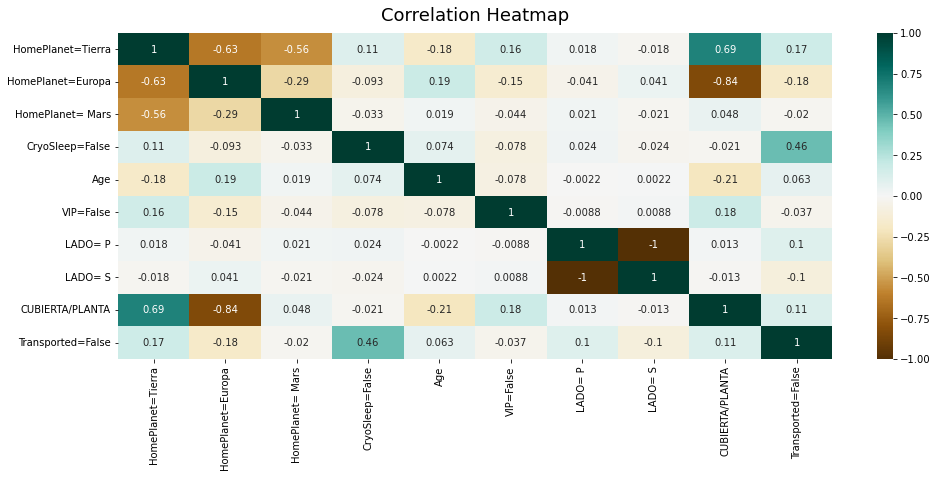

In [32]:
#SELECCION DE CARACTERISTICAS ---> Matriz de confusion

#Nustro objetivo aplicando la matriz de correlacion de las vraibles, es tratar de eliminar los atributos redundantes, es decir, que tengan una correlacion de +-1
#y hacernos una idea de que variables tienen una mayor influencia lineal con la varable respuesta.



import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(datosEpd.corr(), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG') # method='spearman' / kendall 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [33]:
#OBSERVACIONES

# En la matriz de confusion podemos apreciar que la variables "LADO=X" son totalmente redundantes, por lo que vamos a quitar una de ellas
# para ya que no nos proporciona ningún tipo de información (y hacemos más compactos nuestros datos)

#Por otro lado, parece ser que la variable predictora que más influye es si el pasajero esta criogenizado o no
# mientras que lo que menos influye es si proviene de marte o no. Aunque incluso si fuera 0 tampoco podríamos asegurar que no tuviera relación
# ya que podría existir una más comleja y NO lineal.

#A partir de esto, podemos declinarnos respecto a la sospecha inicial del visualizado que la teoría de la ubicación es la que más se acerca
# mientras que la teoría genética dista más y parece ser que no interviene demasiado en el destino de los pasajeros


datosEpd= datosEpd.drop(columns= 'LADO= S')
datosEpd

,HomePlanet=Tierra,HomePlanet=Europa,HomePlanet= Mars,CryoSleep=False,Age,VIP=False,LADO= P,CUBIERTA/PLANTA,Transported=False
0,0.0,1.0,0.0,1.0,0.333333,1.0,1.0,0.142857,1.0
1,1.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.714286,0.0
2,0.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.000000,1.0
3,0.0,1.0,0.0,1.0,0.333333,1.0,0.0,0.000000,1.0
4,1.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.714286,0.0
...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.666667,0.0,1.0,0.000000,1.0
8689,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.857143,1.0
8690,1.0,0.0,0.0,1.0,0.333333,1.0,0.0,0.857143,0.0
8691,0.0,1.0,0.0,1.0,0.333333,1.0,0.0,0.571429,1.0


In [34]:
#METODO DE ENVOLTURA

In [35]:
#Lo que necesitamos para hacerlo

X_datosEpd= datosEpd.drop(columns='Transported=False')

X_datosEnp=X_datosEpd.to_numpy()

Y_datosEpd= datosEpd[['Transported=False']]

Y_datosEnp=Y_datosEpd.to_numpy()

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

strat_cv = StratifiedKFold(5, shuffle=True, random_state=2345)

dt = DecisionTreeClassifier(random_state=2345)

cross_val_score(dt, X_datosEnp, Y_datosEnp, cv=strat_cv, scoring='balanced_accuracy')

array([0.72346717, 0.7330156 , 0.71822701, 0.72431584, 0.73115709])

In [36]:

#!pip install mlxtend

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

dt = DecisionTreeClassifier(random_state=2354)

sbs = SFS(dt, k_features=1, forward=False, floating=False, 
          scoring='balanced_accuracy',cv=strat_cv) #verbose=2

sbs = sbs.fit(X_datosEpd, Y_datosEpd)



In [37]:
sbs.subsets_

{8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.72346717, 0.7330156 , 0.71822701, 0.72431584, 0.73115709]),
  'avg_score': 0.7260365437395454,
  'feature_names': ('HomePlanet=Tierra',
   'HomePlanet=Europa',
   'HomePlanet= Mars',
   'CryoSleep=False',
   'Age',
   'VIP=False',
   'LADO= P',
   'CUBIERTA/PLANTA')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 6, 7),
  'cv_scores': array([0.72463452, 0.73419155, 0.7205703 , 0.72380003, 0.73172852]),
  'avg_score': 0.726984984190981,
  'feature_names': ('HomePlanet=Tierra',
   'HomePlanet=Europa',
   'HomePlanet= Mars',
   'CryoSleep=False',
   'Age',
   'LADO= P',
   'CUBIERTA/PLANTA')},
 6: {'feature_idx': (0, 1, 2, 3, 4, 7),
  'cv_scores': array([0.72374231, 0.73755271, 0.72228792, 0.72076875, 0.73556232]),
  'avg_score': 0.7279828022969375,
  'feature_names': ('HomePlanet=Tierra',
   'HomePlanet=Europa',
   'HomePlanet= Mars',
   'CryoSleep=False',
   'Age',
   'CUBIERTA/PLANTA')},
 5: {'feature_idx': (0, 1, 3, 4, 7),
  

In [38]:
#Observacion

# # A través de los rendimientos de los árboles de decision (parecido a lo que hablabamos en la visualizacion) podemos ver que el 
# mejor rendimiento lo consigue sin las variables preditoras VIP y LADO

# Estas dos variables en la matriz de correlación también tienen una muy baja puntuación, aunque no coincide con perfectamente
# con las que son más bajas como por ejemplo MARS, esto parece significar que MARS tiene una relación más compleja(no lineal) con 
# la variable respuesta, ya que de alguna forma si la quitamos no mejora el rendimiento.
# evidenetmente si tuvieramos 800000 pasajeros en vez de 8000 este tipo de afirmaciones tendrían más creedibilidad

#Aunque hemos decidio no quitarlas para seguir confirmando nuestras sospechas aplicando el mismo proceso con los rendimientos 
# del siguiente árbol que usaremos (knn)



In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_Viaje = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

sbs2 = SFS(knn_Viaje, k_features=1, forward=False, floating=False, 
          scoring='balanced_accuracy',cv=strat_cv) #verbose=2

sbs2 = sbs2.fit(X_datosEpd, Y_datosEpd)
sbs2.subsets_

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

{8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7),
  'cv_scores': array([0.65166444, 0.68606909, 0.67452989, 0.65410892, 0.68993412]),
  'avg_score': 0.6712612922805274,
  'feature_names': ('HomePlanet=Tierra',
   'HomePlanet=Europa',
   'HomePlanet= Mars',
   'CryoSleep=False',
   'Age',
   'VIP=False',
   'LADO= P',
   'CUBIERTA/PLANTA')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 6, 7),
  'cv_scores': array([0.65165585, 0.68376879, 0.68741369, 0.65817249, 0.68953749]),
  'avg_score': 0.674109661453432,
  'feature_names': ('HomePlanet=Tierra',
   'HomePlanet=Europa',
   'HomePlanet= Mars',
   'CryoSleep=False',
   'Age',
   'LADO= P',
   'CUBIERTA/PLANTA')},
 6: {'feature_idx': (1, 2, 3, 4, 6, 7),
  'cv_scores': array([0.66154291, 0.6994238 , 0.68664516, 0.66371991, 0.68129912]),
  'avg_score': 0.6785261806876753,
  'feature_names': ('HomePlanet=Europa',
   'HomePlanet= Mars',
   'CryoSleep=False',
   'Age',
   'LADO= P',
   'CUBIERTA/PLANTA')},
 5: {'feature_idx': (1, 2, 3, 6, 7),
  'cv_scores

In [40]:
#OBSERVACION

# El mejor rendimiento obtenido se encuentre en la sexta iteración, que nos indica que quitan las variables TIERRA y VIP.
# Coinciden en que quitando VIP mejora el rendimiento, mientras que distan en la otra variable

#Por lo que hemos decidido quitar la variable VIP de nuestro conjunto de dato

datosEpd= datosEpd.drop(columns= 'VIP=False')
datosEpd


,HomePlanet=Tierra,HomePlanet=Europa,HomePlanet= Mars,CryoSleep=False,Age,LADO= P,CUBIERTA/PLANTA,Transported=False
0,0.0,1.0,0.0,1.0,0.333333,1.0,0.142857,1.0
1,1.0,0.0,0.0,1.0,0.333333,0.0,0.714286,0.0
2,0.0,1.0,0.0,1.0,0.666667,0.0,0.000000,1.0
3,0.0,1.0,0.0,1.0,0.333333,0.0,0.000000,1.0
4,1.0,0.0,0.0,1.0,0.000000,0.0,0.714286,0.0
...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.666667,1.0,0.000000,1.0
8689,1.0,0.0,0.0,0.0,0.000000,0.0,0.857143,1.0
8690,1.0,0.0,0.0,1.0,0.333333,0.0,0.857143,0.0
8691,0.0,1.0,0.0,1.0,0.333333,0.0,0.571429,1.0


# ENTRENAMIENTO DE MODELOS//OPTIMIZACION DE HIPERPARÁMETROS
## --> APRENDIZAJE SUPERVISADO
### 0) Separacion de datos
### 1) ARBOLES DE DECISIÓN
  #### 1.1) Visualización gráfica del árbol
### 2) KNN (vecino más cercano)
### 3) PERCEPTRON MULTICAPA
### 4) RESUMEN FINAL

## --> APRENDIZAJE NO SUPERVISADO
### KMEANS

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, SCORERS

In [42]:
#SEPARACION DE VARIABLES:
# como vamos a calcular los rendimientos (precisiones) de los clasificadores mediante validación cruzada.
#Solo seprararemos nuestro conjunto de datos en dos (uno para las variables predictoras, y otro para la variable respuesta) por
# eso no aplico train_test_split
# lo voy a separar a mano y despues lo voy a pasar a np


X_datosEpd= datosEpd.drop(columns='Transported=False')

X_datosEnp=X_datosEpd.to_numpy()

Y_datosEpd= datosEpd[['Transported=False']]

Y_datosEnp=Y_datosEpd.to_numpy()


### ARBOLES DE DECISION

In [43]:
# Vamos a entrenar el modelo mediante validación cruzada directamente, por eso no llevamos acabo previamente
# la separación de datos entre entrenamiento y prueba

In [44]:
# Creo una instancia de objeto de árbol de decisión con el que trabajaré.
# Primero aplicaré dos ejemplos: uno con los valores por defecto, y otro en el que implemento un valor al azar
# de dos parámetros del clasificador (el minimo de hojas por nodo y la máxima profundidad del árbol)
# Posterirmente, a través de gridsearch optimizaré los valores de estos para mejorar el rendimiento.
#Obteniendo el más óptimo posible



AD_dt = DecisionTreeClassifier(random_state=99)

In [45]:
AD_acc = cross_val_score(AD_dt, X_datosEnp, Y_datosEnp, cv=5)
AD_acc

array([0.71075331, 0.73030477, 0.72742956, 0.72151899, 0.72957422])

In [46]:
# El rendimiento va a ser la media de los 5 conjuntos de entrenamiento

In [47]:
AD_acc.mean()

0.7239161694319248

In [48]:
# Arbol de decisión con número mínimo de muestras requeridas para dividir un nodo interno igual a 2 y
#numero minimo de objetos igual a 2

In [49]:
AD_dt = DecisionTreeClassifier(random_state=99, max_depth = 4, min_samples_leaf = 2)

In [50]:
AD_acc = cross_val_score(AD_dt, X_datosEnp, Y_datosEnp, cv=5)
AD_acc

array([0.71535365, 0.7239793 , 0.71650374, 0.72497123, 0.72497123])

In [51]:
AD_acc.mean()

0.7211558300704544

In [52]:
# Optimización de hiperparámetros para algoritmo de árboles de decisión

# Optimizamos los mismos parámetros que probamos anteriormente al azar, y obtenemos el rendimiento a través de 
# la validación cruzada con precisión balanceada (ya que nos parece más justa que viene por defecto)

In [53]:
parameters = {'criterion':['gini', 'entropy'], 'max_depth':range(1,10), 'min_samples_leaf': [1,5,10,20,30]}

gcv_AD = GridSearchCV(AD_dt, parameters, cv=5, scoring='balanced_accuracy')

Se ha conseguido un rendimiento mejor

In [54]:
gcv_AD.fit(X_datosEpd, Y_datosEpd)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, min_samples_leaf=2,
                                              random_state=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': [1, 5, 10, 20, 30]},
             scoring='balanced_accuracy')

In [55]:
gcv_AD.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}

In [56]:
gcv_AD.best_score_

0.7282601530334193

In [57]:
# Visualización del árbol de decision obtenido anteriormente.

from sklearn.tree import export_graphviz
export_graphviz(gcv_AD.best_estimator_, out_file="tree.dot", class_names=["True", "False"],
                feature_names=['HomePlanet=Tierra', 'HomePlanet=Europa', 'HomePlanet= Mars', 'CryoSleep=False', 
                               'Age', 'LADO= P', 'CUBIERTA/PLANTA'], impurity=False, filled=True)

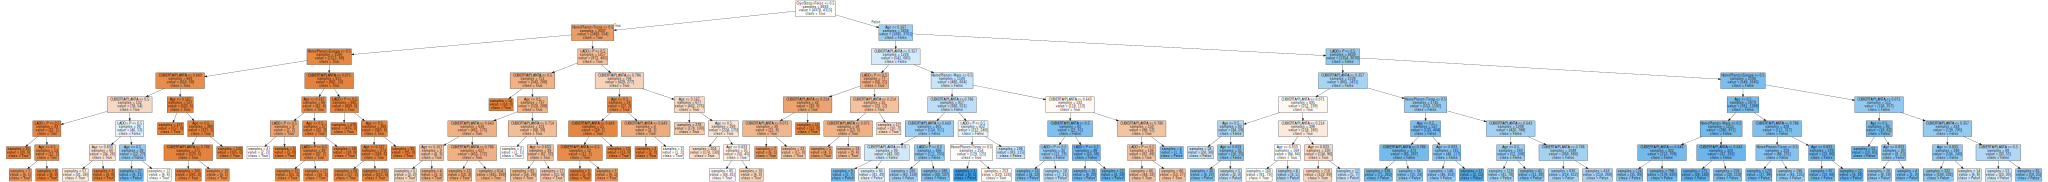

In [58]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [59]:
# RESUMEN de rendimientos

# Como curiosidad hemos usado la ayuda de chatgpt para hacer esta tabla

from tabulate import tabulate

# Crea una lista de listas con los datos de la tabla
datos = [
    ["Por defecto", "72,391%"],
    ["MinHojas=2 y MaxProfundidad=4", "72,115%"],
    [ "MinHojas=1 y MaxProfundidad=7" , '72,826%' ]
]

# Imprime la tabla usando el formato "simple"
print(tabulate(datos, headers=["Parámetros", "Rendimiento"], tablefmt="simple"))





Parámetros                     Rendimiento
-----------------------------  -------------
Por defecto                    72,391%
MinHojas=2 y MaxProfundidad=4  72,115%
MinHojas=1 y MaxProfundidad=7  72,826%


### KNN

In [60]:
#Podemos aplicar satisfactoriamente este algoritmo porque en el preprocesado de los datos normalizamos estos.

#Creamos una instancia del clasificador usando distancia manhattam y con 5 vecinos


knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

In [61]:
CV_knn = cross_val_score(knn, X_datosEnp, Y_datosEnp, cv=5, scoring='balanced_accuracy')
CV_knn

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

array([0.69180132, 0.66598875, 0.68777282, 0.651561  , 0.67524383])

In [62]:
CV_knn.mean()

0.6744735452339

In [63]:
# Optimización de hiperparámetros para algoritmo de Knn

# Optmizamos la forma de medir la distancias entre los individuos y el número de vecinos más cercanpos (individuos que se toman
# para observar sus variables respuesta)

#Usamos k impares ya que no existe el caso de empate, mientras que si cogiesemos un numero para sí.

In [64]:
# COMENTARIO DESTACABLE
# al principio optimizamos entre estos valores de k 'n_neighbors':[1, 3, 5, 7, 9, 11, 13, 15]
#pero observamos al aumentarlos que mejoraba el rendimiento por lo que para no tardar tanto en la computación
# hemos decidido quitar los primeros valores k hasta encontrar el valor máximo de k


parameters_knn = {'n_neighbors':[17, 19, 21, 23, 25, 27, 29, 31, 33, 35], 'metric':['euclidean', 'manhattan']}

gcv_knn = GridSearchCV(knn, parameters_knn, cv=5, scoring='balanced_accuracy')

In [65]:
gcv_knn.fit(X_datosEnp, Y_datosEnp)

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='manhattan'),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [17, 19, 21, 23, 25, 27, 29, 31, 33,
                                         35]},
             scoring='balanced_accuracy')

In [66]:
gcv_knn.best_params_

{'metric': 'euclidean', 'n_neighbors': 33}

In [67]:
gcv_knn.best_score_

0.7236462832743378

In [68]:
#RESUMEN de rendimientos obtenidos

datos = [
    ["Manhattan y k=5", "67,447%"],
    ["Euclidean y k=33", "72,364%"]
]

# Imprime la tabla usando el formato "simple"
print(tabulate(datos, headers=["Parámetros", "Rendimiento"], tablefmt="simple"))


Parámetros        Rendimiento
----------------  -------------
Manhattan y k=5   67,447%
Euclidean y k=33  72,364%


### Perceptrón multicapa

In [69]:
from sklearn.neural_network import MLPClassifier

# Creamos  una instancia de red neuronal formada por una sola capa intermedia compuesta por 100 neuronas con una 
# computación de 200 épocas 
# Que vamos a entrenar y validar de nuevo con la técnica de validación cruzada (para comparar este clasificador con los dos anteriores)

perceptronMC = MLPClassifier(random_state=99, hidden_layer_sizes=(100,), max_iter=200)
#mlp_perceptron.fit(X_datosEnp, Y_datosEnp)

In [70]:
perceptronCV=cross_val_score(perceptronMC, X_datosEnp, Y_datosEnp, cv=5, scoring='balanced_accuracy')

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y 

In [71]:
#RENDIMIENTO
perceptronCV.mean()

0.7245424852548681

In [72]:
# Optimización de hiperparámetros

In [73]:
# Optimizamos la topologíaRed, la funcion de activacion, y el algoritmo de nrtenamiento.
# Probamos dos topologías de red, una de una capa con 100 neuronas (intermedia) y otra de de dos capas con 50 cada una
# por jugar un poco y ver como varían los rendimientos

parametersMC = {'hidden_layer_sizes':[(100,), (50,50)],'activation':['identity', 'logistic', 'tanh', 'relu'], 
                'solver':['lbfgs', 'sgd', 'adam']}

gcvMC = GridSearchCV(perceptronMC, parametersMC, cv=5, scoring='balanced_accuracy')

In [74]:
gcvMC.fit(X_datosEnp, Y_datosEnp)

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y 

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\farme

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\farme

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=99),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (50, 50)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='balanced_accuracy')

In [75]:
#El mejor rendimiento se consigue con estos parámetros, y en efecto con la segunda topología.

gcvMC.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'solver': 'lbfgs'}

In [76]:
#RENDIMIENTO
gcvMC.best_score_

0.7272561779136327

In [77]:
#Por seguir jugando con las topologías, comparamos la de mejor rendimiento de antes con otra nueva con tres capas
# y 25 por capa. Y quitamos la optimización de los algoritmos de entrenamiento para aligerar el tiempo de ejecucuion 
# (ya que anteriormente fue muy largo)

parametersMC2 = {'hidden_layer_sizes':[(50,50), (25,25,25)],'activation':['identity', 'logistic', 'tanh', 'relu']}

gcvMC2 = GridSearchCV(perceptronMC, parametersMC, cv=5, scoring='balanced_accuracy')

In [78]:
gcvMC2.fit(X_datosEnp, Y_datosEnp)

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y 

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\farme

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using rave

C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\farme\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\farme

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=99),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(100,), (50, 50)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='balanced_accuracy')

In [79]:
# Efectivamente encontramos mejor rendimiento en la tercera topología probada

gcvMC2.best_params_

{'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'solver': 'lbfgs'}

In [80]:
gcvMC2.best_score_

0.7272561779136327

In [113]:
#RESUMEN de rendimientos obtenidos

datos = [
    ["fActivacion=relu, TopologíaRed=(100,), N_epocas=200, A_Entrenamiento=lbfgs" , "72,454%"],
    ["fActivacion=tanh, TopologíaRed=(50, 50), N_epocas= 200 , A_Entrenamiento=lbfgs", "72,725%"],
    ["fActivacion=relu, TopologíaRed=(25, 25, 25), N_epocas= 200, A_Entrenamiento=lbfgs", "72,884%"]
]

# Imprime la tabla usando el formato "simple"
print(tabulate(datos, headers=["Parámetros", "Rendimiento"], tablefmt="simple"))

Parámetros                                                                         Rendimiento
---------------------------------------------------------------------------------  -------------
fActivacion=relu, TopologíaRed=(100,), N_epocas=200, A_Entrenamiento=lbfgs         72,454%
fActivacion=tanh, TopologíaRed=(50, 50), N_epocas= 200 , A_Entrenamiento=lbfgs     72,725%
fActivacion=relu, TopologíaRed=(25, 25, 25), N_epocas= 200, A_Entrenamiento=lbfgs  72,884%


### Resumen final

In [119]:
# Resumen de todos los MEJORES rendimientos obtenidos de los clasificadores

datos = [
    ["Arboles de Decisión" , "MinHojas=1 y MaxProfundidad=7" , '72,826%'],
    ["KNN", "Euclidean y k=33", "72,364%"],
    ["Perceptrón Multicapa (25,25,25)", "fActivacion=relu,  N_epocas= 200, A_Entrenamiento=lbfgs", "72,884%"]
]

# Imprime la tabla usando el formato "simple"
print(tabulate(datos, headers=["Clasificador", "Parámetros", "Rendimiento"], tablefmt="simple"))

Clasificador                     Parámetros                                               Rendimiento
-------------------------------  -------------------------------------------------------  -------------
Arboles de Decisión              MinHojas=1 y MaxProfundidad=7                            72,826%
KNN                              Euclidean y k=33                                         72,364%
Perceptrón Multicapa (25,25,25)  fActivacion=relu,  N_epocas= 200, A_Entrenamiento=lbfgs  72,884%


### APRENDIZAJE NO SUPERVISADO

### K MEANS
#### 1) Historia
#### 2) Preprocesado de datos
#### 3) Aplicación del clasificador

In [130]:
# HISTORIA

# La empresa organizadora del viaje espacial, pidió antes de saber el triste destino de los pasajeros, 
# que analisaramos a los tripulantes de la nave para  poder decidir que tipo de ofertas y productos venderles 
# a la llegada a su destino final.
# Para ello, decidimos aplicar kmeans, un algoritmo de aprendizaje no supervisado, con el que podemos dividir a la población en 
# distintos grupos según sus consumo en la nave y según su edad.
# Personificando posteriormente a estos grupos en un individuo "medio" con el que su agencia publicitaria decidirá que productos
# ofrecer para hacer un mejor negocio. (como por ejemplo puede ser los hoteles para hospedarse, cerca de que tiendas poner las habitaciones,
# por que tiendas pasar en las rutas turísticas...)

In [115]:
datosKMeans = df[['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [116]:
datosKMeans

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,False,0.0,0.0,0.0,0.0,0.0
1,24.0,False,109.0,9.0,25.0,549.0,44.0
2,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...
8688,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [120]:
#Realizamos LA IMPUTACION a través de transformaciones sobre las columnas
from sklearn.pipeline import Pipeline

edad = Pipeline([("media",SimpleImputer(strategy='mean')),
                   ("A",KBinsDiscretizer(4, strategy='uniform', encode='ordinal'))])
VIP = Pipeline([("modaV",SimpleImputer(strategy='most_frequent')),
                   ("VIP",OneHotEncoder())])
PLDineroGastado = Pipeline([("media2",SimpleImputer(strategy='mean'))])

ct = ColumnTransformer([
    ("media",edad,['Age']),
    ("modaV",VIP,['VIP']),
    ("me1",PLDineroGastado,['RoomService']), 
    ("me2",PLDineroGastado,['FoodCourt']),
    ("me3",PLDineroGastado,['ShoppingMall']), 
    ("me4",PLDineroGastado,['Spa']),
    ("me5",PLDineroGastado,['VRDeck'])
    ]) #para la ultima variable lo hacemos así, pero podriamos hacerlo igual que en la primera variable

datosKMeans2 = ct.fit_transform(datosKMeans)

In [121]:
datosKMeans2

array([[1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 2.500e+01, 5.490e+02,
        4.400e+01],
       [2.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 6.715e+03,
        4.900e+01],
       ...,
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 1.872e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 3.530e+02,
        3.235e+03],
       [2.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.200e+01]])

In [122]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(datosKMeans2)
datosKMeans2_escalado = scaler.transform(datosKMeans2)
print(datosKMeans2_escalado[:6,]) 

[[3.33333333e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.33333333e-01 1.00000000e+00 0.00000000e+00 7.60801284e-03
  3.01881729e-04 1.06419207e-03 2.45001785e-02 1.82322960e-03]
 [6.66666667e-01 0.00000000e+00 1.00000000e+00 3.00132617e-03
  1.19947674e-01 0.00000000e+00 2.99669761e-01 2.03041478e-03]
 [3.33333333e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00
  4.30349177e-02 1.57926103e-02 1.48563013e-01 7.99734803e-03]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 2.11488797e-02
  2.34796901e-03 6.42772007e-03 2.52142092e-02 8.28740728e-05]
 [6.66666667e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00
  1.62009861e-02 0.00000000e+00 1.29864334e-02 0.00000000e+00]]


In [126]:
datosKMeans2_escalado = pd.DataFrame(datosKMeans2_escalado, columns=['Age', 'VIP=FALSE', 'VIP=TRUE', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
datosKMeans2_escalado

,Age,VIP=FALSE,VIP=TRUE,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.333333,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.333333,1.0,0.0,0.007608,0.000302,0.001064,0.024500,0.001823
2,0.666667,0.0,1.0,0.003001,0.119948,0.000000,0.299670,0.002030
3,0.333333,1.0,0.0,0.000000,0.043035,0.015793,0.148563,0.007997
4,0.000000,1.0,0.0,0.021149,0.002348,0.006428,0.025214,0.000083
...,...,...,...,...,...,...,...,...
8688,0.666667,0.0,1.0,0.000000,0.228726,0.000000,0.073322,0.003066
8689,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8690,0.333333,1.0,0.0,0.000000,0.000000,0.079687,0.000045,0.000000
8691,0.333333,1.0,0.0,0.000000,0.035186,0.000000,0.015753,0.134049


In [133]:
datosKMeans3=datosKMeans2_escalado.drop(columns='VIP=TRUE')
datosKMeans3

,Age,VIP=FALSE,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.333333,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.333333,1.0,0.007608,0.000302,0.001064,0.024500,0.001823
2,0.666667,0.0,0.003001,0.119948,0.000000,0.299670,0.002030
3,0.333333,1.0,0.000000,0.043035,0.015793,0.148563,0.007997
4,0.000000,1.0,0.021149,0.002348,0.006428,0.025214,0.000083
...,...,...,...,...,...,...,...
8688,0.666667,0.0,0.000000,0.228726,0.000000,0.073322,0.003066
8689,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
8690,0.333333,1.0,0.000000,0.000000,0.079687,0.000045,0.000000
8691,0.333333,1.0,0.000000,0.035186,0.000000,0.015753,0.134049


In [131]:
# Creo una instancia del clasificador KMedias(Aprendizaje NO supervisado) con el que vamos a trabajar.

from sklearn.cluster import KMeans

Kmeans = KMeans(random_state=99, n_clusters=3)
#mlp_perceptron.fit(X_datosEnp, Y_datosEnp)

In [134]:
# Ajustar los datos

Kmeans.fit(datosKMeans3)

KMeans(n_clusters=3, random_state=99)

In [135]:
# Obtener las etiquetas de los grupos asignados

Kmeans.labels_

array([0, 0, 2, ..., 0, 0, 1])

In [139]:
# Estos serían los individuos representativos de cada grupo y en los que se va a basar la agencia de publicidad para mejorar las ventas

Kmeans.cluster_centers_

array([[ 2.26069652e-01,  1.00000000e+00,  1.48343399e-02,
         1.26860440e-02,  7.21033381e-03,  1.17529841e-02,
         1.11656536e-02],
       [ 7.11817168e-01,  1.00000000e+00,  1.69630085e-02,
         2.04866216e-02,  7.74521684e-03,  1.96450310e-02,
         1.39208917e-02],
       [ 4.57286432e-01, -3.33066907e-16,  3.27082998e-02,
         5.93898725e-02,  1.04660126e-02,  3.37465347e-02,
         5.03941868e-02]])